In [1]:
#데이터 불러오기

In [2]:
import numpy as np
import math
import pandas as pd
loan_result = pd.read_csv("loan_result.csv")
#log_data = pd.read_csv("log_data.csv")
user_spec = pd.read_csv("user_spec.csv",encoding='CP949')

In [3]:
#spec테이블과 result테이블을 application_id 기준으로 정렬

In [4]:
sorted_spec = user_spec.sort_values(by='application_id')
sorted_result = loan_result.sort_values(by='application_id')

In [5]:
#전처리

In [93]:
#목적 전처리

In [6]:
def convert_purpose(data):
    if data == "생활비" or data == "LIVING":
        return "생활비"
    elif data == "대환대출" or data == "SWITCHLOAN":
        return "대환대출"
    elif data == "주택구입" or data == "BUYHOUSE":
        return "주택구입"
    elif data == "전월세보증금" or data == "HOUSEDEPOSIT":
        return "전월세보증금"
    elif data == "사업자금" or data == "BUSINESS":
        return "사업자금"
    elif data == "투자" or data == "INVEST":
        return "투자"
    elif data == "자동차구입" or data == "BUYCAR":
        return "자동차구입"
    elif data == "기타" or data == "ETC":
        return "기타"

In [7]:
sorted_spec['purpose'] = sorted_spec['purpose'].apply(convert_purpose)

In [94]:
#입사일자 -> 근무 개월 수

In [9]:
sorted_spec.loc[sorted_spec['company_enter_month'] > 10000000, 'company_enter_month'] = round(sorted_spec['company_enter_month']/100)

In [10]:
sorted_spec['company_enter_month'].value_counts()

202201.0    58941
202203.0    48229
202202.0    43011
202112.0    40291
202111.0    38868
            ...  
197412.0        1
197512.0        1
192205.0        1
195606.0        1
196909.0        1
Name: company_enter_month, Length: 554, dtype: int64

In [11]:
def date_to_num(x):
  if str(x).find("-") != -1 :
    return str(x).split("-")[0] + str(x).split("-")[1]
  return str(x)

In [12]:
sorted_spec['insert_time'] = sorted_spec['insert_time'].apply(date_to_num)
sorted_spec['insert_time'].value_counts()

202206    364826
202205    364588
202204    339598
202203    325204
Name: insert_time, dtype: int64

In [13]:
def year_to_mon(x, y):
    return ((round(pd.to_numeric(y)/100 - x/100))*12 + (pd.to_numeric(y)%100 - x%100))

In [14]:
sorted_spec['company_enter_month'] = year_to_mon(sorted_spec['company_enter_month'], sorted_spec['insert_time'])

In [15]:
sorted_spec['company_enter_month'].value_counts()

3.0       59497
4.0       50006
2.0       47245
1.0       41361
5.0       41088
          ...  
1262.0        1
544.0         1
463.0         1
1199.0        1
470.0         1
Name: company_enter_month, Length: 568, dtype: int64

In [95]:
#열이름 변경

In [16]:
sorted_spec.rename(columns={'company_enter_month' : 'working_period'}, inplace=True)
sorted_spec

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,working_period,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
535078,1,777860,1990.0,1.0,202205,580.0,40000000.0,EARNEDINCOME,63.0,정규직,전월세,30000000.0,대환대출,0.0,0.0,NaN,NaN
705026,2,28169,1981.0,1.0,202204,590.0,43000000.0,EARNEDINCOME,37.0,정규직,자가,10000000.0,생활비,NaN,NaN,12.0,204000000.0
206459,3,492886,1955.0,1.0,202205,520.0,20000000.0,FREELANCER,124.0,기타,전월세,3000000.0,생활비,0.0,NaN,4.0,66000000.0
359412,4,209531,1978.0,0.0,202206,720.0,26000000.0,EARNEDINCOME,147.0,정규직,기타가족소유,16000000.0,생활비,0.0,NaN,5.0,67000000.0
1236114,6,59078,1991.0,1.0,202204,630.0,36000000.0,EARNEDINCOME,2.0,정규직,전월세,36000000.0,대환대출,0.0,NaN,4.0,72000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209570,2167819,210537,1979.0,1.0,202203,480.0,45000000.0,EARNEDINCOME,185.0,정규직,기타가족소유,45000000.0,생활비,NaN,NaN,5.0,50000000.0
784477,2167820,781452,1992.0,1.0,202203,680.0,40000000.0,FREELANCER,5.0,기타,기타가족소유,30000000.0,생활비,NaN,NaN,1.0,NaN
115419,2167822,105164,1996.0,1.0,202206,570.0,13000000.0,EARNEDINCOME,0.0,기타,기타가족소유,7000000.0,생활비,0.0,0.0,2.0,6000000.0
233491,2167823,556194,1968.0,0.0,202205,580.0,20000000.0,OTHERINCOME,NaN,기타,기타가족소유,5000000.0,생활비,0.0,NaN,18.0,48000000.0


In [96]:
#nan데이터 0으로 채우기

In [17]:
sorted_spec.loc[sorted_spec['personal_rehabilitation_yn'] != sorted_spec['personal_rehabilitation_yn'], 'personal_rehabilitation_yn'] = 0
sorted_spec.loc[sorted_spec['personal_rehabilitation_complete_yn'] != sorted_spec['personal_rehabilitation_complete_yn'], 'personal_rehabilitation_complete_yn'] = 0
spec = sorted_spec.dropna(subset=['credit_score', 'existing_loan_cnt', 'working_period'], axis=0)

In [18]:
spec

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,working_period,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
705026,2,28169,1981.0,1.0,202204,590.0,43000000.0,EARNEDINCOME,37.0,정규직,자가,10000000.0,생활비,0.0,0.0,12.0,204000000.0
206459,3,492886,1955.0,1.0,202205,520.0,20000000.0,FREELANCER,124.0,기타,전월세,3000000.0,생활비,0.0,0.0,4.0,66000000.0
359412,4,209531,1978.0,0.0,202206,720.0,26000000.0,EARNEDINCOME,147.0,정규직,기타가족소유,16000000.0,생활비,0.0,0.0,5.0,67000000.0
1236114,6,59078,1991.0,1.0,202204,630.0,36000000.0,EARNEDINCOME,2.0,정규직,전월세,36000000.0,대환대출,0.0,0.0,4.0,72000000.0
1259012,7,706623,1975.0,1.0,202206,450.0,30000000.0,FREELANCER,56.0,기타,전월세,3000000.0,생활비,0.0,0.0,4.0,29000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985684,2167817,314169,1991.0,0.0,202204,580.0,50000000.0,FREELANCER,41.0,기타,전월세,2000000.0,생활비,0.0,0.0,6.0,10000000.0
209570,2167819,210537,1979.0,1.0,202203,480.0,45000000.0,EARNEDINCOME,185.0,정규직,기타가족소유,45000000.0,생활비,0.0,0.0,5.0,50000000.0
784477,2167820,781452,1992.0,1.0,202203,680.0,40000000.0,FREELANCER,5.0,기타,기타가족소유,30000000.0,생활비,0.0,0.0,1.0,NaN
115419,2167822,105164,1996.0,1.0,202206,570.0,13000000.0,EARNEDINCOME,0.0,기타,기타가족소유,7000000.0,생활비,0.0,0.0,2.0,6000000.0


In [97]:
#nan데이터 평균값으로 채우기

In [19]:
spec['tmp'] = spec['existing_loan_amt'] / spec['existing_loan_cnt']
tmp_mean = spec['tmp'].mean()
spec.loc[spec['existing_loan_amt'] != spec['existing_loan_amt'], 'existing_loan_amt'] = tmp_mean

C:\Users\guddn\AppData\Local\Temp\ipykernel_3892\605954347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spec['tmp'] = spec['existing_loan_amt'] / spec['existing_loan_cnt']


In [20]:
spec = spec.drop(['tmp','user_id','insert_time'], axis=1)
spec

,application_id,birth_year,gender,credit_score,yearly_income,income_type,working_period,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
705026,2,1981.0,1.0,590.0,43000000.0,EARNEDINCOME,37.0,정규직,자가,10000000.0,생활비,0.0,0.0,12.0,2.040000e+08
206459,3,1955.0,1.0,520.0,20000000.0,FREELANCER,124.0,기타,전월세,3000000.0,생활비,0.0,0.0,4.0,6.600000e+07
359412,4,1978.0,0.0,720.0,26000000.0,EARNEDINCOME,147.0,정규직,기타가족소유,16000000.0,생활비,0.0,0.0,5.0,6.700000e+07
1236114,6,1991.0,1.0,630.0,36000000.0,EARNEDINCOME,2.0,정규직,전월세,36000000.0,대환대출,0.0,0.0,4.0,7.200000e+07
1259012,7,1975.0,1.0,450.0,30000000.0,FREELANCER,56.0,기타,전월세,3000000.0,생활비,0.0,0.0,4.0,2.900000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985684,2167817,1991.0,0.0,580.0,50000000.0,FREELANCER,41.0,기타,전월세,2000000.0,생활비,0.0,0.0,6.0,1.000000e+07
209570,2167819,1979.0,1.0,480.0,45000000.0,EARNEDINCOME,185.0,정규직,기타가족소유,45000000.0,생활비,0.0,0.0,5.0,5.000000e+07
784477,2167820,1992.0,1.0,680.0,40000000.0,FREELANCER,5.0,기타,기타가족소유,30000000.0,생활비,0.0,0.0,1.0,1.727389e+07
115419,2167822,1996.0,1.0,570.0,13000000.0,EARNEDINCOME,0.0,기타,기타가족소유,7000000.0,생활비,0.0,0.0,2.0,6.000000e+06


In [21]:
spec.isnull().sum()

application_id                            0
birth_year                             5989
gender                                 5989
credit_score                              0
yearly_income                             1
income_type                               0
working_period                            0
employment_type                           0
houseown_type                             0
desired_amount                            0
purpose                                   0
personal_rehabilitation_yn                0
personal_rehabilitation_complete_yn       0
existing_loan_cnt                         0
existing_loan_amt                         0
dtype: int64

In [22]:
spec = spec.dropna(subset=['birth_year', 'gender', 'yearly_income','income_type'], axis=0)
spec.isnull().sum()

application_id                         0
birth_year                             0
gender                                 0
credit_score                           0
yearly_income                          0
income_type                            0
working_period                         0
employment_type                        0
houseown_type                          0
desired_amount                         0
purpose                                0
personal_rehabilitation_yn             0
personal_rehabilitation_complete_yn    0
existing_loan_cnt                      0
existing_loan_amt                      0
dtype: int64

In [98]:
#결측값처리 끝

In [23]:
spec

,application_id,birth_year,gender,credit_score,yearly_income,income_type,working_period,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
705026,2,1981.0,1.0,590.0,43000000.0,EARNEDINCOME,37.0,정규직,자가,10000000.0,생활비,0.0,0.0,12.0,2.040000e+08
206459,3,1955.0,1.0,520.0,20000000.0,FREELANCER,124.0,기타,전월세,3000000.0,생활비,0.0,0.0,4.0,6.600000e+07
359412,4,1978.0,0.0,720.0,26000000.0,EARNEDINCOME,147.0,정규직,기타가족소유,16000000.0,생활비,0.0,0.0,5.0,6.700000e+07
1236114,6,1991.0,1.0,630.0,36000000.0,EARNEDINCOME,2.0,정규직,전월세,36000000.0,대환대출,0.0,0.0,4.0,7.200000e+07
1259012,7,1975.0,1.0,450.0,30000000.0,FREELANCER,56.0,기타,전월세,3000000.0,생활비,0.0,0.0,4.0,2.900000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985684,2167817,1991.0,0.0,580.0,50000000.0,FREELANCER,41.0,기타,전월세,2000000.0,생활비,0.0,0.0,6.0,1.000000e+07
209570,2167819,1979.0,1.0,480.0,45000000.0,EARNEDINCOME,185.0,정규직,기타가족소유,45000000.0,생활비,0.0,0.0,5.0,5.000000e+07
784477,2167820,1992.0,1.0,680.0,40000000.0,FREELANCER,5.0,기타,기타가족소유,30000000.0,생활비,0.0,0.0,1.0,1.727389e+07
115419,2167822,1996.0,1.0,570.0,13000000.0,EARNEDINCOME,0.0,기타,기타가족소유,7000000.0,생활비,0.0,0.0,2.0,6.000000e+06


In [99]:
#출생년도 나이로 변환

In [24]:
def year_to_age(data):
    return (2022 - data)

In [25]:
spec['birth_year'] = year_to_age(spec['birth_year'])
spec

C:\Users\guddn\AppData\Local\Temp\ipykernel_3892\714395205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spec['birth_year'] = year_to_age(spec['birth_year'])


,application_id,birth_year,gender,credit_score,yearly_income,income_type,working_period,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
705026,2,41.0,1.0,590.0,43000000.0,EARNEDINCOME,37.0,정규직,자가,10000000.0,생활비,0.0,0.0,12.0,2.040000e+08
206459,3,67.0,1.0,520.0,20000000.0,FREELANCER,124.0,기타,전월세,3000000.0,생활비,0.0,0.0,4.0,6.600000e+07
359412,4,44.0,0.0,720.0,26000000.0,EARNEDINCOME,147.0,정규직,기타가족소유,16000000.0,생활비,0.0,0.0,5.0,6.700000e+07
1236114,6,31.0,1.0,630.0,36000000.0,EARNEDINCOME,2.0,정규직,전월세,36000000.0,대환대출,0.0,0.0,4.0,7.200000e+07
1259012,7,47.0,1.0,450.0,30000000.0,FREELANCER,56.0,기타,전월세,3000000.0,생활비,0.0,0.0,4.0,2.900000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985684,2167817,31.0,0.0,580.0,50000000.0,FREELANCER,41.0,기타,전월세,2000000.0,생활비,0.0,0.0,6.0,1.000000e+07
209570,2167819,43.0,1.0,480.0,45000000.0,EARNEDINCOME,185.0,정규직,기타가족소유,45000000.0,생활비,0.0,0.0,5.0,5.000000e+07
784477,2167820,30.0,1.0,680.0,40000000.0,FREELANCER,5.0,기타,기타가족소유,30000000.0,생활비,0.0,0.0,1.0,1.727389e+07
115419,2167822,26.0,1.0,570.0,13000000.0,EARNEDINCOME,0.0,기타,기타가족소유,7000000.0,생활비,0.0,0.0,2.0,6.000000e+06


In [26]:
spec.rename(columns={'birth_year' : 'age'}, inplace=True)
spec

C:\Users\guddn\AppData\Local\Temp\ipykernel_3892\2439033635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spec.rename(columns={'birth_year' : 'age'}, inplace=True)


,application_id,age,gender,credit_score,yearly_income,income_type,working_period,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
705026,2,41.0,1.0,590.0,43000000.0,EARNEDINCOME,37.0,정규직,자가,10000000.0,생활비,0.0,0.0,12.0,2.040000e+08
206459,3,67.0,1.0,520.0,20000000.0,FREELANCER,124.0,기타,전월세,3000000.0,생활비,0.0,0.0,4.0,6.600000e+07
359412,4,44.0,0.0,720.0,26000000.0,EARNEDINCOME,147.0,정규직,기타가족소유,16000000.0,생활비,0.0,0.0,5.0,6.700000e+07
1236114,6,31.0,1.0,630.0,36000000.0,EARNEDINCOME,2.0,정규직,전월세,36000000.0,대환대출,0.0,0.0,4.0,7.200000e+07
1259012,7,47.0,1.0,450.0,30000000.0,FREELANCER,56.0,기타,전월세,3000000.0,생활비,0.0,0.0,4.0,2.900000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985684,2167817,31.0,0.0,580.0,50000000.0,FREELANCER,41.0,기타,전월세,2000000.0,생활비,0.0,0.0,6.0,1.000000e+07
209570,2167819,43.0,1.0,480.0,45000000.0,EARNEDINCOME,185.0,정규직,기타가족소유,45000000.0,생활비,0.0,0.0,5.0,5.000000e+07
784477,2167820,30.0,1.0,680.0,40000000.0,FREELANCER,5.0,기타,기타가족소유,30000000.0,생활비,0.0,0.0,1.0,1.727389e+07
115419,2167822,26.0,1.0,570.0,13000000.0,EARNEDINCOME,0.0,기타,기타가족소유,7000000.0,생활비,0.0,0.0,2.0,6.000000e+06


In [27]:
#result테이블에서 is_applied만 추출

In [28]:
result = loan_result[['is_applied','application_id']]

In [29]:
result = result.dropna(subset=['is_applied'],axis=0)
result

,is_applied,application_id
13284,1.0,2157865
13285,0.0,576643
13286,0.0,576643
13287,0.0,2136706
13288,0.0,2136706
...,...,...
13519634,0.0,1969227
13519635,0.0,1969227
13519636,0.0,1969227
13519637,0.0,1969227


In [100]:
#spec 테이블과 is_applied 병합

In [30]:
merge = pd.merge(left=spec, right=result, how="inner", on="application_id")

In [31]:
merge = merge.drop_duplicates()

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
sc = StandardScaler()

In [101]:
#특성 별로 군집을 생성

In [82]:
cluster1 = merge[['age','credit_score','yearly_income']]
cluster2 = merge[['credit_score','yearly_income','desired_amount','existing_loan_cnt','existing_loan_amt']]
cluster3 = merge[['purpose','houseown_type']]

In [102]:
#정규화

In [83]:
cluster1_scaled = sc.fit_transform(cluster1)
pd.DataFrame(cluster1_scaled)

,0,1,2
0,0.159687,-0.701590,-0.023554
1,-0.828764,-0.333611,-0.083853
2,-1.520680,-0.701590,-0.195837
3,-1.520680,-0.701590,-0.195837
4,-0.433384,-0.885580,-0.032168
...,...,...,...
766453,0.357377,-1.713533,-0.006325
766454,-0.927609,0.126363,-0.049396
766455,-0.927609,0.126363,-0.049396
766456,0.258532,-0.977575,-0.118310


In [103]:
#k_means 클러스터링 실행

In [84]:
kmeans1 = KMeans(n_clusters=4, random_state=0)
clusters1 = kmeans1.fit(cluster1_scaled)

cluster1['cluster'] = clusters1.labels_
cluster1['cluster'].unique()

C:\Users\guddn\AppData\Local\Temp\ipykernel_3892\3656979851.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1['cluster'] = clusters1.labels_


array([0, 3, 2, 1])

In [104]:
#클러스터별 항목 개수

In [85]:
cluster1.groupby('cluster').count()

,age,credit_score,yearly_income
cluster,,,
0,275082,275082,275082
1,226,226,226
2,144149,144149,144149
3,347001,347001,347001


In [105]:
#클러스터별 항목 평균

In [86]:
cluster1.groupby('cluster').mean()

,age,credit_score,yearly_income
cluster,,,
0,49.210410,630.718331,4.931709e+07
1,46.535398,670.353982,5.628491e+09
2,38.897433,845.785749,5.288352e+07
3,31.792710,619.864352,3.628810e+07


In [87]:
X1 = cluster1_scaled.copy()
pca1 = PCA(n_components=2)

pca1.fit(X1)
x_pca1 = pca1.transform(X1)
x_pca1

array([[-0.27032042,  0.6659128 ],
       [-0.71772668, -0.10222636],
       [-1.38790102, -0.12194395],
       ...,
       [-0.52515187, -0.53120954],
       [-0.40818914,  0.92122817],
       [-0.40818914,  0.92122817]])

In [88]:
pca_df1 = pd.DataFrame(x_pca1)
pca_df1['cluster'] = cluster1['cluster'] 
pca_df1.head()

,0,1,cluster
0,-0.270320,0.665913,0.0
1,-0.717727,-0.102226,3.0
2,-1.387901,-0.121944,NaN
3,-1.387901,-0.121944,NaN
4,-0.724512,0.559375,NaN


In [106]:
#시각화

C:\Users\guddn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


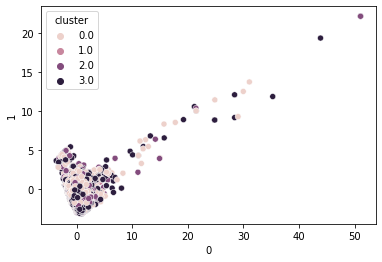

In [89]:
axs1 = plt.subplots()
axs1 = sns.scatterplot(0, 1, hue='cluster', data=pca_df1)

In [90]:
join1 = pd.concat([cluster1,merge],axis=1)
join1.head()

,age,credit_score,yearly_income,cluster,application_id,age,gender,credit_score,yearly_income,income_type,working_period,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,is_applied
0,41.0,590.0,43000000.0,0,2,41.0,1.0,590.0,43000000.0,EARNEDINCOME,37.0,정규직,자가,10000000.0,생활비,0.0,0.0,12.0,204000000.0,0.0
1,31.0,630.0,36000000.0,3,6,31.0,1.0,630.0,36000000.0,EARNEDINCOME,2.0,정규직,전월세,36000000.0,대환대출,0.0,0.0,4.0,72000000.0,0.0
16,24.0,590.0,23000000.0,3,14,24.0,1.0,590.0,23000000.0,EARNEDINCOME,10.0,일용직,기타가족소유,20000000.0,대환대출,0.0,0.0,2.0,9000000.0,0.0
21,24.0,590.0,23000000.0,3,14,24.0,1.0,590.0,23000000.0,EARNEDINCOME,10.0,일용직,기타가족소유,20000000.0,대환대출,0.0,0.0,2.0,9000000.0,1.0
27,35.0,570.0,42000000.0,3,17,35.0,1.0,570.0,42000000.0,EARNEDINCOME,9.0,계약직,기타가족소유,10000000.0,생활비,0.0,0.0,3.0,56000000.0,1.0


In [91]:
result1 = join1.groupby(['cluster','is_applied'], as_index=False).count()[['cluster', 'is_applied', 'application_id']]
result1

,cluster,is_applied,application_id
0,0,0.0,173001
1,0,1.0,102081
2,1,0.0,139
3,1,1.0,87
4,2,0.0,102334
5,2,1.0,41815
6,3,0.0,212780
7,3,1.0,134221


In [107]:
#결론

In [92]:
de = (result1['is_applied']==1) #신청자
for i in range(0, 4):
    tmp = (result1['cluster']==i)
    print('Cluster '+ str(i) + '의 신청 비율은 ' + str(round((result1.loc[(tmp & de),  'application_id'].sum() / result1.loc[tmp, 'application_id'].sum())*100, 2)) + '%')
    print(' ')

Cluster 0의 신청 비율은 37.11%
 
Cluster 1의 신청 비율은 38.5%
 
Cluster 2의 신청 비율은 29.01%
 
Cluster 3의 신청 비율은 38.68%
 
